<a href="https://colab.research.google.com/github/aravind0654/chinna/blob/master/Crypto_Price_Prtediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, LSTM
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.layers import GRU,Dropout
from keras.optimizers import SGD
plt.style.use('fivethirtyeight')


Retrieving data from web using source_id Yahoo

In [ ]:
df = web.DataReader('XRP-INR',data_source ="yahoo",start = '2014-04-01', end = '2021-01-05')

In [ ]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,0.353866,0.312755,0.312755,0.328770,78071364,0.328770
2014-09-17,0.337389,0.309153,0.328747,0.311850,29824901,0.311850
2014-09-18,0.313793,0.296433,0.311754,0.300736,24772582,0.300736
2014-09-19,0.301444,0.288179,0.300708,0.290355,19631487,0.290355
2014-09-20,0.291548,0.276258,0.290149,0.278078,18837395,0.278078
...,...,...,...,...,...,...
2020-10-16,17.826361,17.569239,17.666395,17.695030,86187567611,17.695030
2020-10-17,17.877811,17.668648,17.689140,17.789953,90976678694,17.789953
2020-10-18,18.300880,17.652044,17.796110,18.053129,105376544733,18.053129


In [ ]:
df.shape

(2227, 6)

* Creating a graph to visualize the data.*

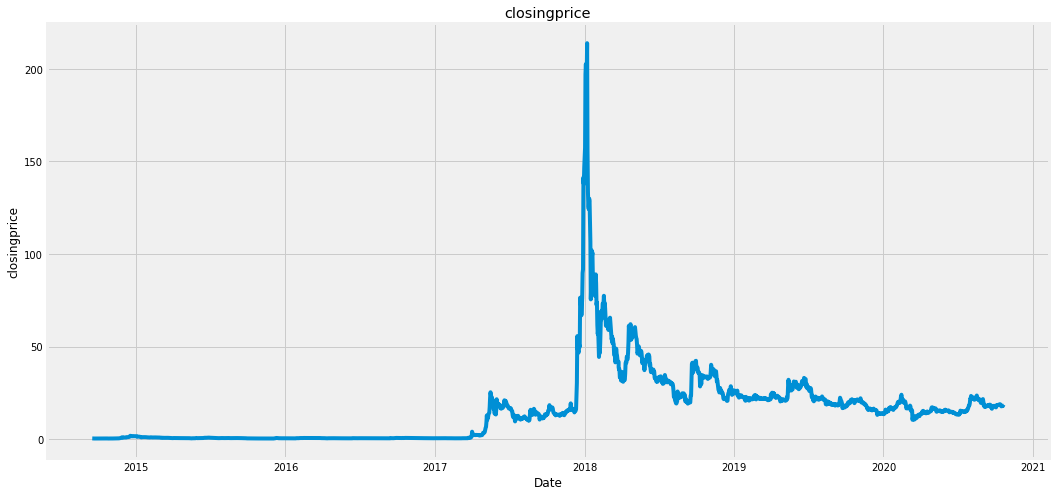

In [ ]:
plt.figure(figsize=(16,8))
plt.title('closingprice')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('closingprice')
plt.show() 

Training data

Creating a new data frame with only the closing price and convert it to an array.
Then created training data set to contain about 80% of the data a variable using the length of the training data set.

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1782

scaling the data set to be values between 0 and 1

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)
scaler_data

array([[0.00026657],
       [0.00018738],
       [0.00013536],
       ...,
       [0.08322835],
       [0.08250219],
       [0.08555643]])

Create a training data set that contains the past 60 day closing price values that we want to use to predict the 61st closing price value.


In [ ]:
train_data = scaler_data[0:training_data_len]
X_train=[]
Y_train=[]
for i in range (60,len(train_data)):
  X_train.append(train_data[i-60:i,0])
  Y_train.append(train_data[i,0])
  if i <=60:
    print(X_train)
    print(Y_train)
    print()

[array([2.66573196e-04, 1.87377888e-04, 1.35355722e-04, 8.67655445e-05,
       2.93007157e-05, 5.59349908e-05, 4.57331877e-05, 5.88809787e-05,
       8.33137489e-05, 4.85792974e-05, 7.41804750e-05, 2.39281064e-04,
       8.29556661e-05, 7.37672918e-05, 1.00410216e-04, 1.31570116e-04,
       1.74407952e-04, 1.50982892e-04, 1.06964094e-04, 9.00513414e-05,
       9.47884409e-05, 1.02228808e-04, 1.05908956e-04, 1.24767240e-04,
       9.08120058e-05, 1.20806708e-04, 9.35843229e-05, 1.27412338e-04,
       1.14301932e-04, 1.30177541e-04, 1.35955689e-04, 1.53472314e-04,
       1.48900655e-04, 1.81524552e-04, 2.13598282e-04, 2.13289999e-04,
       1.99651884e-04, 1.82461538e-04, 7.86888032e-05, 2.96308996e-05,
       1.30946575e-04, 1.14881811e-04, 9.75083079e-05, 1.33626268e-04,
       1.26135683e-04, 6.98646494e-05, 6.80142526e-05, 1.10353814e-04,
       1.05999069e-04, 1.25197581e-04, 1.31510412e-04, 1.31755086e-04,
       1.40357025e-04, 1.45861345e-04, 1.37964970e-04, 1.37941675e-04,
     

converting the independent train data set ‘x_train’ and dependent train data set ‘y_train’ to numpy arrays so they can be used for training the LSTM model.

In [ ]:
x_train,y_train = np.array(X_train),np.array(Y_train)

Reshape the data to be 3-dimensional in the form [number of samples, number of time steps, and number of features]. The LSTM model is expecting a 3-dimensional data set.

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1722, 60, 1)

Build the LSTM model to have two LSTM layers with 50 neurons and two Dense layers, one with 25 neurons and the other with 1 neuron.

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


Compile the model using the mean squared error (MSE) loss function and the adam optimizer.

In [ ]:
model.compile(optimizer= 'adam',loss = 'mean_squared_error')

Train the model using the training data sets. Note, fit is another name for train. Batch size is the total number of training examples present in a single batch, and epoch is the number of iterations when an entire data set is passed forward and backward through the neural network.

In [ ]:
model.fit(x_train,y_train,batch_size= 43,epochs=1000)

Epoch 1/1000
41/41 [==============================] - 9s 9ms/step - loss: 0.0061
Epoch 2/1000
41/41 [==============================] - 0s 8ms/step - loss: 0.0011
Epoch 3/1000
41/41 [==============================] - 0s 8ms/step - loss: 8.5307e-04
Epoch 4/1000
41/41 [==============================] - 0s 7ms/step - loss: 8.6989e-04
Epoch 5/1000
41/41 [==============================] - 0s 8ms/step - loss: 5.4809e-04
Epoch 6/1000
41/41 [==============================] - 0s 7ms/step - loss: 4.1806e-04
Epoch 7/1000
41/41 [==============================] - 0s 8ms/step - loss: 4.4550e-04
Epoch 8/1000
41/41 [==============================] - 0s 7ms/step - loss: 7.0077e-04
Epoch 9/1000
41/41 [==============================] - 0s 7ms/step - loss: 4.1443e-04
Epoch 10/1000
41/41 [==============================] - 0s 7ms/step - loss: 3.0495e-04
Epoch 11/1000
41/41 [==============================] - 0s 7ms/step - loss: 3.6284e-04
Epoch 12/1000
41/41 [==============================] - 0s 8ms/step - lo

KeyboardInterrupt: ignored

Create a test data set.

In [ ]:
test_data = scaler_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

Then convert the independent test data set ‘x_test’ to a numpy array so it can be used for testing the LSTM model.

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions = model.predict(x_test)

In [ ]:
predictions = scaler.inverse_transform(predictions)

In [ ]:
#calculating root mean_square_error
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

visualizing the data.

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date')
plt.ylabel('closingprice')
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','val','predictions'])
plt.show()

Actual and predicted values

In [ ]:
valid

Testing the model with new data using last_60_days as test data to predict price

In [ ]:
df = web.DataReader('BTC-USD',data_source ="yahoo",start = '2014-04-01', end = '2020-11-24')
#Create a new dataframe
new_df = df.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

Actual price

In [ ]:
df = web.DataReader('BTC-USD',data_source ="yahoo",start = '2020-11-25', end = '2020-11-25')

In [ ]:
print(df['Close'])

Building GRU model

In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [ ]:
#compiling the model
regressorGRU.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
#fitting the model
regressorGRU.fit(x_train,y_train,batch_size= 20,epochs=100)

In [ ]:
#converting and scaling test_data
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_with_gru = regressorGRU.predict(x_test)
predicted_with_gru = scaler.inverse_transform(predicted_with_gru)

In [ ]:
#Rmse Error
rmse = np.sqrt(np.mean(predicted_with_gru - y_test)**2)
rmse

visualising the graph

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predicted_with_gru'] = predicted_with_gru
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date')
plt.ylabel('closingprice')
plt.plot(train['Close'])
plt.plot(valid[['Close','predicted_with_gru']])
plt.legend(['Train','val','predicted_with_gru'])
plt.show()

Actual and predicted prices

In [ ]:
valid

Testing the model with new data with last_60days as test data

In [ ]:

df = web.DataReader('XRP-INR',data_source ="yahoo",start = '2014-04-01', end = '2020-11-24')
#Create a new dataframe
new_df = df.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price =regressorGRU .predict(X_test)


In [ ]:
#undo the scaling and predicting price
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

In [ ]:
#Actual price
df = web.DataReader('XRP-INR',data_source ="yahoo",start = '2020-11-25', end = '2020-11-25')
print(df['Close'])